# Bringing “Suspense and Surprise” to (Actual Belief) Data

### Reasearch by: Judd B. Kessler, Andrew McClellan, Andrew Schotter

#### Program Author: Anwar A. Ruff

In [24]:
import sys
import pandas as pd
import numpy as np
from pandas import DataFrame, Series, ExcelFile, ExcelWriter
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Figure 1. Subject Beliefs at Each Elicitation (Castle TV Drama)

### Figure 1. Data

In [39]:
f1df = pd.read_csv('data/figure_1.csv').drop("Subject Number", axis=1)
f1df.index = range(1, len(f1df) + 1)
f1df = f1df.transpose()
f1df.index = range(1, len(f1df) + 1)
f1df

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
1,59.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,95.0,...,50.0,50.0,65.0,50.0,52.5,50.0,90.0,50.0,90.0,50.0
2,68.0,60.0,50.0,60.0,51.5,67.5,50.0,50.0,75.0,90.0,...,55.0,61.0,50.5,75.0,55.0,60.0,60.0,57.5,60.0,85.0
3,77.5,70.0,60.0,75.0,51.5,72.5,65.0,60.0,80.0,92.5,...,60.0,68.0,55.0,95.0,75.0,60.0,67.5,62.5,67.5,90.0
4,82.5,70.0,65.0,75.0,52.5,77.5,85.0,55.0,80.0,97.5,...,57.5,69.5,82.5,95.0,65.0,80.0,90.0,75.0,80.0,95.0
5,87.5,75.0,65.0,75.0,53.0,80.0,75.0,55.0,80.0,97.5,...,55.0,71.5,72.5,95.0,65.0,85.0,97.5,75.0,82.5,95.0
6,92.5,85.0,65.0,85.0,52.0,85.0,75.0,55.0,75.0,93.5,...,52.5,79.0,97.5,95.0,60.0,75.0,92.5,75.0,80.0,90.0
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


## Figure 1: Subject Beliefs at Each Elicitation (Castle TV Drama)

### Figure 1. line plot (Light Background)

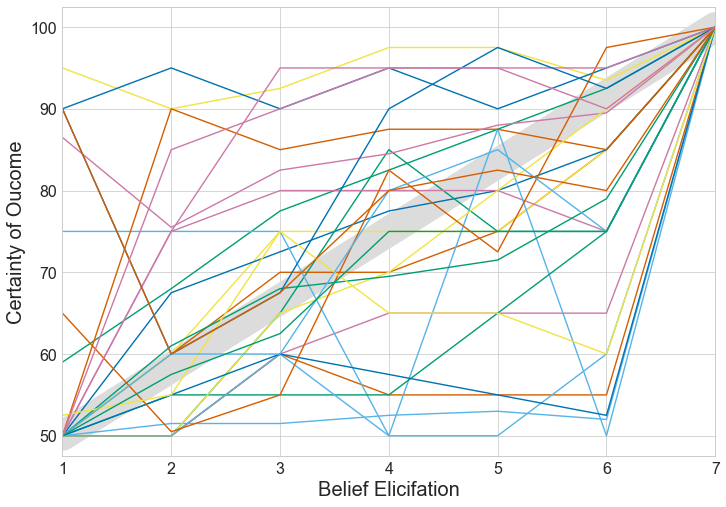

In [130]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f1df.columns) + 1):
    plt.plot(f1df[col])

### Figure 1. Line Plot (Dark Background)

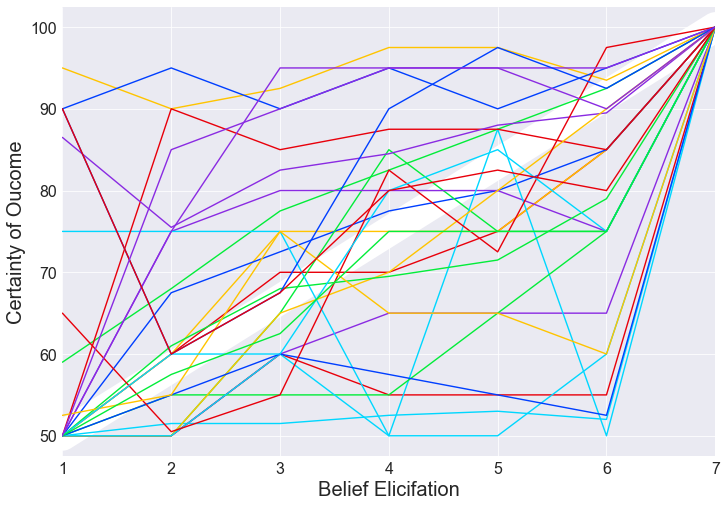

In [131]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f1df.columns) + 1):
    plt.plot(f1df[col])

## Figure 2. Subject Beliefs at Each Elicitation (Cowboys vs. Eagles Football Game):

### Figure 2. Data

In [132]:
f2df = pd.read_csv('data/figure_2.csv').drop("Subject Number", axis=1)
f2df.index = range(1, len(f2df) + 1)
f2df = f2df.transpose()
f2df.index = range(1, len(f2df) + 1)
f2df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,75.0,100.0,75.0,60.0,56.0,50.0,50.0,70.0,50.0,50.0,...,70.0,60.0,69.0,50.0,50.0,50.0,75.0,85.0,NaN,NaN
2,80.0,100.0,75.0,60.0,55.0,53.0,50.0,65.0,67.0,50.0,...,73.0,65.0,68.0,50.0,50.0,75.0,65.0,85.0,NaN,NaN
3,75.0,100.0,75.0,63.0,70.0,53.0,60.0,75.0,60.0,50.0,...,70.0,60.0,69.0,50.0,62.0,50.0,75.0,90.0,NaN,NaN
4,80.0,100.0,75.0,55.0,87.0,53.0,80.0,80.0,60.0,50.0,...,70.0,67.0,73.0,50.0,65.0,65.0,76.0,85.0,NaN,NaN
5,86.0,100.0,75.0,51.0,90.0,50.0,83.0,84.0,55.0,50.0,...,55.0,60.0,63.0,59.0,56.0,65.0,80.0,90.0,NaN,NaN
6,80.0,100.0,75.0,50.0,94.0,60.0,86.0,85.0,55.0,50.0,...,52.0,73.0,66.0,70.0,50.0,60.0,88.0,90.0,NaN,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,...,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


### Figure 2. Line Plot (Light Background)

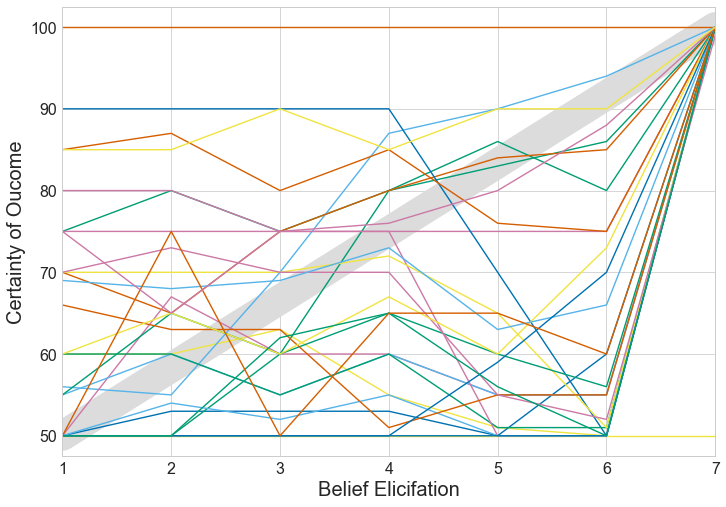

In [133]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f2df.columns) + 1):
    plt.plot(f2df[col])

### Figure 2. Line Plot (Dark Background)

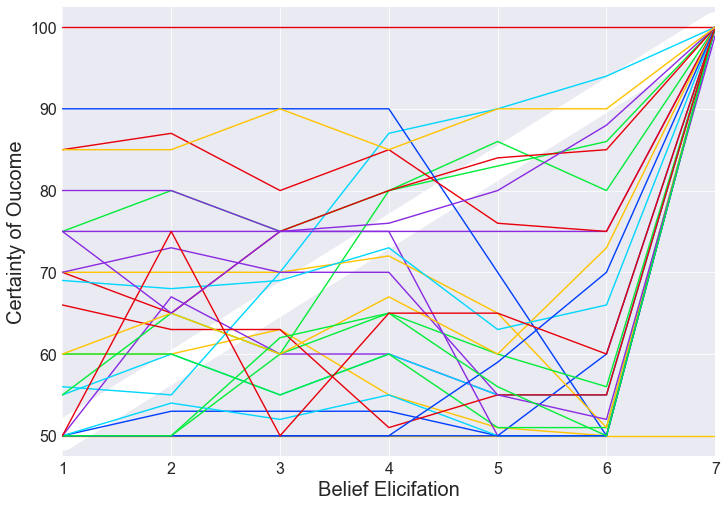

In [138]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f2df.columns) + 1):
    plt.plot(f2df[col])

## Figure 3: Subject Beliefs at Each Elicitation (Eagles vs. Saints Football Game)

### Figure 3. Data

In [135]:
f3df = pd.read_csv('data/figure_2.csv').drop("Subject Number", axis=1)
f3df.index = range(1, len(f3df) + 1)
f3df = f3df.transpose()
f3df.index = range(1, len(f3df) + 1)
f3df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,75.0,100.0,75.0,60.0,56.0,50.0,50.0,70.0,50.0,50.0,...,70.0,60.0,69.0,50.0,50.0,50.0,75.0,85.0,NaN,NaN
2,80.0,100.0,75.0,60.0,55.0,53.0,50.0,65.0,67.0,50.0,...,73.0,65.0,68.0,50.0,50.0,75.0,65.0,85.0,NaN,NaN
3,75.0,100.0,75.0,63.0,70.0,53.0,60.0,75.0,60.0,50.0,...,70.0,60.0,69.0,50.0,62.0,50.0,75.0,90.0,NaN,NaN
4,80.0,100.0,75.0,55.0,87.0,53.0,80.0,80.0,60.0,50.0,...,70.0,67.0,73.0,50.0,65.0,65.0,76.0,85.0,NaN,NaN
5,86.0,100.0,75.0,51.0,90.0,50.0,83.0,84.0,55.0,50.0,...,55.0,60.0,63.0,59.0,56.0,65.0,80.0,90.0,NaN,NaN
6,80.0,100.0,75.0,50.0,94.0,60.0,86.0,85.0,55.0,50.0,...,52.0,73.0,66.0,70.0,50.0,60.0,88.0,90.0,NaN,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,...,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


### Figure 2. Line Plot (Light Background)

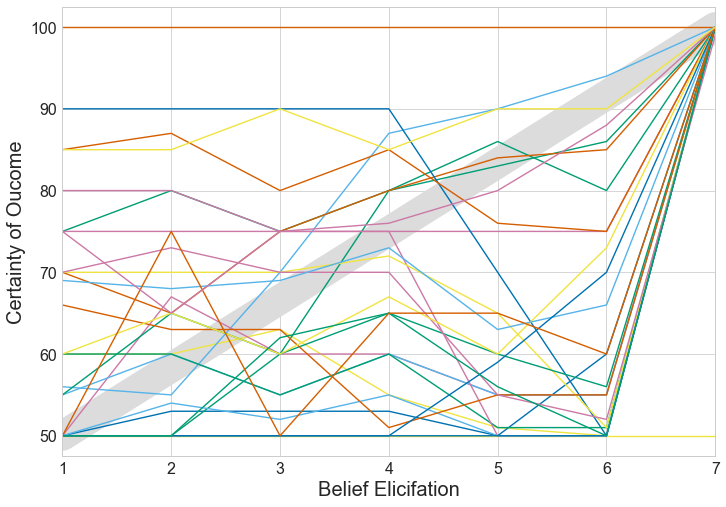

In [136]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f3df.columns) + 1):
    plt.plot(f3df[col])

### Figure 3. Line Plot (Light Background)

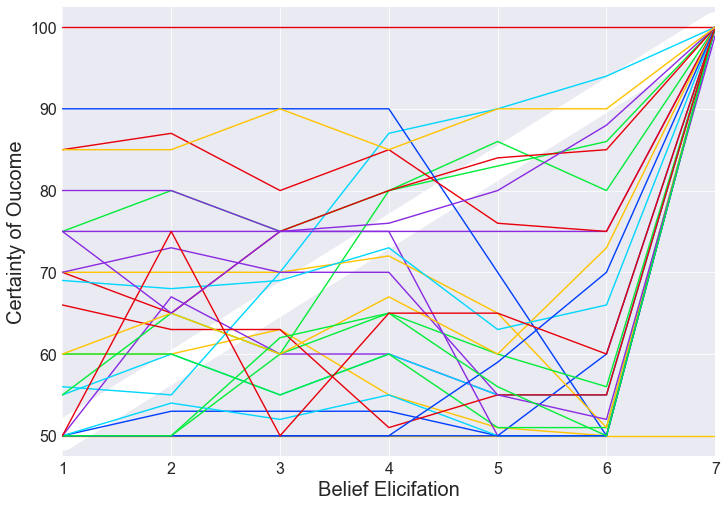

In [137]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f3df.columns) + 1):
    plt.plot(f3df[col])

## Figure 4: Cumulative Distribution of deviations from the Optimal Residual-Variance Path

### Figure 4. Data

In [139]:
f4df = pd.read_csv('data/figure_2.csv').drop("Subject Number", axis=1)
f4df.index = range(1, len(f4df) + 1)
f4df = f4df.transpose()
f4df.index = range(1, len(f4df) + 1)
f4df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,75.0,100.0,75.0,60.0,56.0,50.0,50.0,70.0,50.0,50.0,...,70.0,60.0,69.0,50.0,50.0,50.0,75.0,85.0,NaN,NaN
2,80.0,100.0,75.0,60.0,55.0,53.0,50.0,65.0,67.0,50.0,...,73.0,65.0,68.0,50.0,50.0,75.0,65.0,85.0,NaN,NaN
3,75.0,100.0,75.0,63.0,70.0,53.0,60.0,75.0,60.0,50.0,...,70.0,60.0,69.0,50.0,62.0,50.0,75.0,90.0,NaN,NaN
4,80.0,100.0,75.0,55.0,87.0,53.0,80.0,80.0,60.0,50.0,...,70.0,67.0,73.0,50.0,65.0,65.0,76.0,85.0,NaN,NaN
5,86.0,100.0,75.0,51.0,90.0,50.0,83.0,84.0,55.0,50.0,...,55.0,60.0,63.0,59.0,56.0,65.0,80.0,90.0,NaN,NaN
6,80.0,100.0,75.0,50.0,94.0,60.0,86.0,85.0,55.0,50.0,...,52.0,73.0,66.0,70.0,50.0,60.0,88.0,90.0,NaN,NaN
7,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.0,...,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,NaN,NaN


### Figure 4. Line Plot (Light Background)

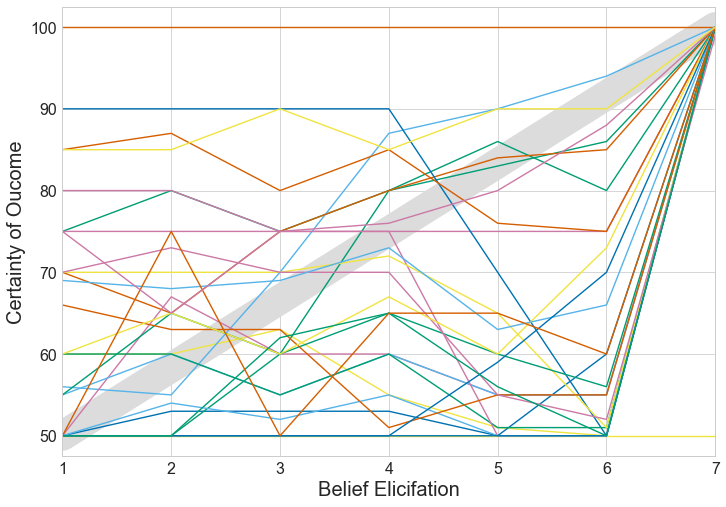

In [140]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="colorblind", style="whitegrid", font_scale=2)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='gainsboro')
for col in range(1, len(f4df.columns) + 1):
    plt.plot(f4df[col])

### Figure 4. Line Plot (Dark Background)

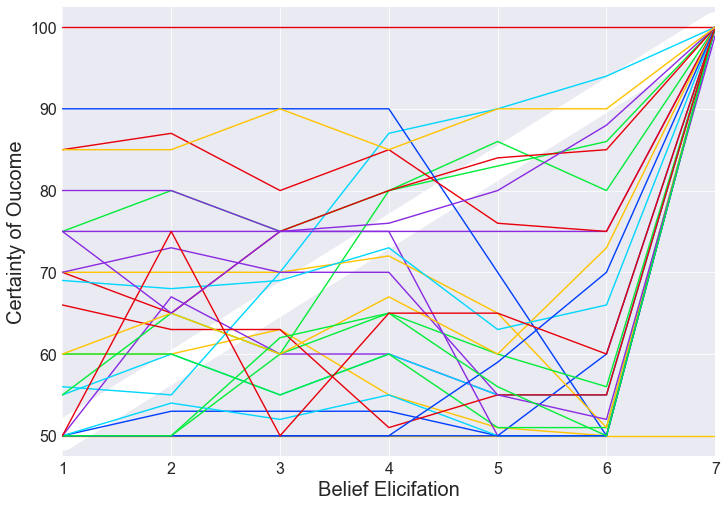

In [141]:
plt.figure(figsize=(11.7,8.27))
sns.set(context="paper", palette="bright", style="darkgrid", font_scale=2)
optimalBelief = np.arange(50, 101, 50/6)
plt.xlim(1, 7)
plt.xlabel('Belief Elicifation', fontsize=20)
plt.ylabel('Certainty of Oucome', fontsize=20)
l = plt.plot(np.arange(1,8, 1), optimalBelief)
plt.setp(l, linewidth=30, color='w')
for col in range(1, len(f4df.columns) + 1):
    plt.plot(f4df[col])